In [ ]:
!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet
!pip install yfinance --quiet
!pip install cufflinks --quiet
!pip install mplfinance --quiet

In [ ]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
import mplfinance as mpf
from datetime import datetime, timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Binance Ticker's list & klines history plotting**

In [ ]:
# Pandas Options
pd.options.display.float_format = '${:,.2f}'.format

# Binance ticker's list DataFrame 
df = pd.read_json('https://api.binance.com/api/v3/ticker/24hr')
# Binance klines history DataFrame
df_test = pd.read_json('https://api.binance.com/api/v3/klines?symbol=ETHTUSD&interval=1d')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    int64  
 1   1       500 non-null    float64
 2   2       500 non-null    float64
 3   3       500 non-null    float64
 4   4       500 non-null    float64
 5   5       500 non-null    float64
 6   6       500 non-null    int64  
 7   7       500 non-null    float64
 8   8       500 non-null    int64  
 9   9       500 non-null    float64
 10  10      500 non-null    float64
 11  11      500 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.0 KB


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1619654400000,"$2,752.19","$2,798.48","$2,671.53","$2,759.63",$979.90,1619740799999,"$2,683,472.67",3793,$489.71,"$1,341,417.16",0
1,1619740800000,"$2,759.63","$2,800.00","$2,723.64","$2,771.75","$1,303.09",1619827199999,"$3,595,775.43",3939,$561.65,"$1,551,313.33",0
2,1619827200000,"$2,774.45","$2,955.00","$2,756.01","$2,947.71","$1,375.16",1619913599999,"$3,954,600.23",4247,$938.98,"$2,703,222.58",0
3,1619913600000,"$2,947.45","$2,986.54","$2,855.28","$2,954.49","$1,136.21",1619999999999,"$3,322,891.78",3734,$594.93,"$1,741,225.94",0
4,1620000000000,"$2,952.46","$3,456.61","$2,952.27","$3,431.15","$2,880.89",1620086399999,"$9,180,875.55",9133,"$1,685.08","$5,343,922.43",0


In [ ]:
df_test.tail()


,0,1,2,3,4,5,6,7,8,9,10,11
495,1662422400000,"$1,617.66","$1,683.01","$1,545.79","$1,557.96",$143.55,1662508799999,"$230,165.17",1270,$95.02,"$151,591.33",0
496,1662508800000,"$1,564.80","$1,675.65","$1,490.06","$1,629.75",$112.79,1662595199999,"$174,227.83",967,$48.69,"$74,704.01",0
497,1662595200000,"$1,630.30","$1,661.18","$1,595.24","$1,635.11",$155.85,1662681599999,"$254,147.13",1557,$50.11,"$81,818.02",0
498,1662681600000,"$1,634.90","$1,743.63","$1,631.37","$1,719.79",$330.01,1662767999999,"$562,765.06",1339,$202.53,"$346,621.63",0
499,1662768000000,"$1,718.15","$1,744.15","$1,695.29","$1,716.38",$24.06,1662854399999,"$41,498.65",343,$17.74,"$30,609.52",0


In [ ]:
df_test.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
df_test.drop('Ignore', axis=1, inplace=True)
df_test['Open Time'] = pd.to_datetime(df_test['Open Time']/1000, unit='s')
df_test['Close Time'] = pd.to_datetime(df_test['Close Time']/1000, unit='s')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           500 non-null    datetime64[ns]
 1   Open                500 non-null    float64       
 2   High                500 non-null    float64       
 3   Low                 500 non-null    float64       
 4   Close               500 non-null    float64       
 5   Volume              500 non-null    float64       
 6   Close Time          500 non-null    datetime64[ns]
 7   Quote Asset Volume  500 non-null    float64       
 8   Number of Trades    500 non-null    int64         
 9   TB Base Volume      500 non-null    float64       
 10  TB Quote Volume     500 non-null    float64       
dtypes: datetime64[ns](2), float64(8), int64(1)
memory usage: 43.1 KB


In [ ]:
df_test.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
0,2021-04-29,"$2,752.19","$2,798.48","$2,671.53","$2,759.63",$979.90,2021-04-29 23:59:59.999000064,"$2,683,472.67",3793,$489.71,"$1,341,417.16"
1,2021-04-30,"$2,759.63","$2,800.00","$2,723.64","$2,771.75","$1,303.09",2021-04-30 23:59:59.999000064,"$3,595,775.43",3939,$561.65,"$1,551,313.33"
2,2021-05-01,"$2,774.45","$2,955.00","$2,756.01","$2,947.71","$1,375.16",2021-05-01 23:59:59.999000064,"$3,954,600.23",4247,$938.98,"$2,703,222.58"
3,2021-05-02,"$2,947.45","$2,986.54","$2,855.28","$2,954.49","$1,136.21",2021-05-02 23:59:59.999000064,"$3,322,891.78",3734,$594.93,"$1,741,225.94"
4,2021-05-03,"$2,952.46","$3,456.61","$2,952.27","$3,431.15","$2,880.89",2021-05-03 23:59:59.999000064,"$9,180,875.55",9133,"$1,685.08","$5,343,922.43"


In [ ]:
df_test.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
495,2022-09-06,"$1,617.66","$1,683.01","$1,545.79","$1,557.96",$143.55,2022-09-06 23:59:59.999000064,"$230,165.17",1270,$95.02,"$151,591.33"
496,2022-09-07,"$1,564.80","$1,675.65","$1,490.06","$1,629.75",$112.79,2022-09-07 23:59:59.999000064,"$174,227.83",967,$48.69,"$74,704.01"
497,2022-09-08,"$1,630.30","$1,661.18","$1,595.24","$1,635.11",$155.85,2022-09-08 23:59:59.999000064,"$254,147.13",1557,$50.11,"$81,818.02"
498,2022-09-09,"$1,634.90","$1,743.63","$1,631.37","$1,719.79",$330.01,2022-09-09 23:59:59.999000064,"$562,765.06",1339,$202.53,"$346,621.63"
499,2022-09-10,"$1,718.15","$1,744.15","$1,695.29","$1,716.38",$24.06,2022-09-10 23:59:59.999000064,"$41,498.65",343,$17.74,"$30,609.52"


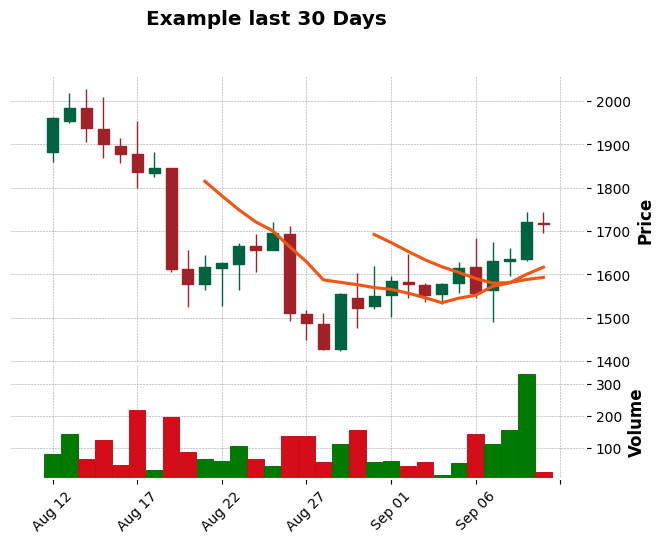

In [ ]:
mpf.plot(df_test.set_index('Close Time').tail(30), 
        type='candle', style='charles', 
        volume=True, 
        title='Example last 30 Days', 
        mav=(10,20,30))

**Yahoo Finance Bollinger Bands**

In [ ]:
# DateTime
today = datetime.today().strftime('%Y-%m-%d')
start_date_eth = '2016-01-01'

# Ticker Data
tickerData = yf.Ticker('ETH-USD') # Get ticker data
getTickerInfo = yf.Ticker('ETH-USD')
TicketInfo = getTickerInfo.info 
tickerDf = tickerData.history(period='1d', start=start_date_eth, end=today) #get the historical prices for this ticker

In [ ]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,$308.64,$329.45,$307.06,$320.88,893249984,0,0
2017-11-10,$320.67,$324.72,$294.54,$299.25,885985984,0,0
2017-11-11,$298.59,$319.45,$298.19,$314.68,842300992,0,0
2017-11-12,$314.69,$319.15,$298.51,$307.91,1613479936,0,0
2017-11-13,$307.02,$328.42,$307.02,$316.72,1041889984,0,0


In [ ]:
tickerDf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-04,"$1,556.90","$1,578.01","$1,543.70","$1,577.64",8884144998,0,0
2022-09-05,"$1,577.88","$1,621.66","$1,559.78","$1,617.18",13060541168,0,0
2022-09-06,"$1,617.24","$1,680.60","$1,561.75","$1,561.75",22946059125,0,0
2022-09-07,"$1,560.91","$1,651.05","$1,500.01","$1,629.91",19560363854,0,0
2022-09-08,"$1,629.81","$1,655.06","$1,603.06","$1,635.35",17621046717,0,0


In [ ]:
tickerDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1765 entries, 2017-11-09 to 2022-09-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1765 non-null   float64
 1   High          1765 non-null   float64
 2   Low           1765 non-null   float64
 3   Close         1765 non-null   float64
 4   Volume        1765 non-null   int64  
 5   Dividends     1765 non-null   int64  
 6   Stock Splits  1765 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 110.3 KB


In [ ]:
# Bollinger bands
qf=cf.QuantFig(tickerDf,title='First Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
fig = qf.iplot(asFigure=True)
fig.show()

**Binance klines Bollinger Bands Plotting**

In [ ]:
# klines with interval and start/end date)
df_klines = pd.read_json('https://api.binance.com/api/v3/klines?symbol=ETHTUSD&interval=1d')

Response

```
[
  [
    1499040000000,      // Kline open time
    "0.01634790",       // Open price
    "0.80000000",       // High price
    "0.01575800",       // Low price
    "0.01577100",       // Close price
    "148976.11427815",  // Volume
    1499644799999,      // Kline close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "0"                 // Unused field. Ignore.
  ]
]
```



In [ ]:
df_klines.info()
df_klines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    int64  
 1   1       500 non-null    float64
 2   2       500 non-null    float64
 3   3       500 non-null    float64
 4   4       500 non-null    float64
 5   5       500 non-null    float64
 6   6       500 non-null    int64  
 7   7       500 non-null    float64
 8   8       500 non-null    int64  
 9   9       500 non-null    float64
 10  10      500 non-null    float64
 11  11      500 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.0 KB


,0,1,2,3,4,5,6,7,8,9,10,11
495,1662422400000,"$1,617.66","$1,683.01","$1,545.79","$1,557.96",$143.55,1662508799999,"$230,165.17",1270,$95.02,"$151,591.33",0
496,1662508800000,"$1,564.80","$1,675.65","$1,490.06","$1,629.75",$112.79,1662595199999,"$174,227.83",967,$48.69,"$74,704.01",0
497,1662595200000,"$1,630.30","$1,661.18","$1,595.24","$1,635.11",$155.85,1662681599999,"$254,147.13",1557,$50.11,"$81,818.02",0
498,1662681600000,"$1,634.90","$1,743.63","$1,631.37","$1,719.79",$330.01,1662767999999,"$562,765.06",1339,$202.53,"$346,621.63",0
499,1662768000000,"$1,718.15","$1,744.15","$1,695.29","$1,716.43",$24.07,1662854399999,"$41,525.60",344,$17.74,"$30,609.52",0


In [ ]:
# DataFrame Processing

#df_klines.reset_index(inplace=True)
df_klines.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
df_klines.drop(['Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume','Ignore'], axis=1, inplace=True)
df_klines['Date'] = pd.to_datetime(df_klines['Date']/1000, unit='s')
df_klines.set_index(pd.DatetimeIndex(df_klines['Date']), inplace=True)

In [ ]:
df_klines.info()
df_klines.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2021-04-29 to 2022-09-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    500 non-null    datetime64[ns]
 1   Open    500 non-null    float64       
 2   High    500 non-null    float64       
 3   Low     500 non-null    float64       
 4   Close   500 non-null    float64       
 5   Volume  500 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 27.3 KB


,Date,Open,High,Low,Close,Volume
Date,,,,,,
2021-04-29,2021-04-29,"$2,752.19","$2,798.48","$2,671.53","$2,759.63",$979.90
2021-04-30,2021-04-30,"$2,759.63","$2,800.00","$2,723.64","$2,771.75","$1,303.09"
2021-05-01,2021-05-01,"$2,774.45","$2,955.00","$2,756.01","$2,947.71","$1,375.16"
2021-05-02,2021-05-02,"$2,947.45","$2,986.54","$2,855.28","$2,954.49","$1,136.21"
2021-05-03,2021-05-03,"$2,952.46","$3,456.61","$2,952.27","$3,431.15","$2,880.89"


In [ ]:
# Bollinger bands plot
qf=cf.QuantFig(df_klines,title='First Quant Figure',legend='top',name='GS')
qf.add_bollinger_bands()
fig = qf.iplot(asFigure=True)
fig.show()